In [1]:
import xarray as xr
import numpy as np
import glob
import json

%matplotlib inline

In [2]:
directory = '../testing/'
filenames = [filename.split('/')[-1].split('.')[-2:] for filename in glob.glob(directory + '*.tif')]
arrs = {file: xr.open_rasterio(f'{directory}{file}.{ext}') for file, ext in filenames}
ds = xr.Dataset(arrs)
ds

<xarray.Dataset>
Dimensions:  (band: 5, x: 512, y: 512)
Coordinates:
  * band     (band) int64 1 2 3 4 5
  * y        (y) float64 47.73 47.73 47.73 47.73 ... 47.68 47.68 47.68 47.68
  * x        (x) float64 16.45 16.45 16.45 16.45 16.45 ... 16.5 16.5 16.5 16.5
Data variables:
    B05      (band, y, x) uint16 ...
    NDVI     (band, y, x) uint16 ...
    B03      (band, y, x) uint16 ...
    CVI      (band, y, x) float32 ...
    NDWI     (band, y, x) uint16 ...
    B08      (band, y, x) uint16 ...
    B04      (band, y, x) uint16 ...

In [3]:
ds = ds.rename({'band': 'time', 'y': 'lat', 'x': 'lon'})
with open(f'{directory}userdata.json') as f:
    userdata = json.load(f)
    ds.coords['time'] = [np.datetime64(t) for t in userdata['time']]

# ds.coords['time']
ds

<xarray.Dataset>
Dimensions:  (lat: 512, lon: 512, time: 5)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-08T11:59:59.500000 ... 2018-09-08T11:59:59.500000
  * lat      (lat) float64 47.73 47.73 47.73 47.73 ... 47.68 47.68 47.68 47.68
  * lon      (lon) float64 16.45 16.45 16.45 16.45 16.45 ... 16.5 16.5 16.5 16.5
Data variables:
    B05      (time, lat, lon) uint16 ...
    NDVI     (time, lat, lon) uint16 ...
    B03      (time, lat, lon) uint16 ...
    CVI      (time, lat, lon) float32 ...
    NDWI     (time, lat, lon) uint16 ...
    B08      (time, lat, lon) uint16 ...
    B04      (time, lat, lon) uint16 ...

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


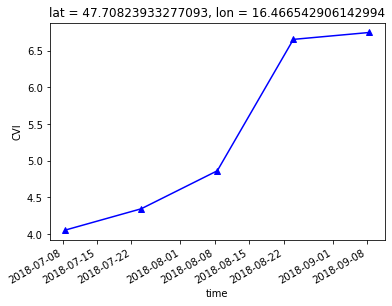

In [4]:
# ds.isel(lat=200, lon=200).B03.plot.line('g-^')
# ds.isel(lat=200, lon=200).B04.plot.line('r-^')
# ds.isel(lat=200, lon=200).B08.plot.line('y-^')
ds.isel(lat=200, lon=200).CVI.plot.line('b-^')